In [1]:
# %matplotlib notebook 
# Uncomment above for interactive plots
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sympy as sym
from sympy import *
from scipy import integrate
import scipy.optimize
import scipy.special
cmap = plt.get_cmap("tab10")
from matplotlib import cm
import itertools
import os, time
from scipy.optimize import fsolve
import scipy.optimize as optimize

In [2]:
#detgrad = (det10-det9)/(p10-p9) # for each layer thickness
# SIMS = [[LT,P,DET,CON,RES,C_CON,C_RES,E]]
det9 = np.array([
    [0.5, 1, 1, 1, 1, 1, 1, 1],# 0.5 entry not real data, only needed to fill out list size
    [1.06, 0.09, 0.0785, 1.8996, 1.4925, 2.0298, 1.1286, 16688.0],
    [1.69, 0.09, 0.0983, 1.7006, 1.6171, 1.8179, 1.0439, 16688.0],
    [2.32, 0.09, 0.1101, 1.5686, 1.6916, 1.7004, 0.9947, 16688.0],
    [3.68, 0.09, 0.1229, 1.3973, 1.7662, 1.5876, 0.9686, 16688.0],
    [4.19, 0.09, 0.1255, 1.3556, 1.7787, 1.5672, 0.9648, 16688.0],
    [5.44, 0.09, 0.1295, 1.2815, 1.7977, 1.538, 0.9628, 16688.0]
])
det10 = np.array([
    [0.5, 11, 11, 11, 11, 11, 11, 11],# 0.5 entry not real data, only needed to fill out list size
    [1.06, 0.1, 0.0874, 1.9117, 1.4908, 2.0329, 1.1067, 16839.0],
    [1.69, 0.1, 0.1094, 1.7088, 1.6158, 1.8204, 1.0224, 16839.0],
    [2.32, 0.1, 0.1226, 1.5747, 1.6895, 1.7024, 0.9918, 16839.0],
    [3.68, 0.1, 0.1368, 1.4012, 1.7661, 1.5888, 0.961, 16839.0],
    [4.19, 0.1, 0.1397, 1.359, 1.7796, 1.5683, 0.9414, 16839.0],
    [5.44, 0.1, 0.1441, 1.2841, 1.7975, 1.5387, 0.9487, 16839.0]
])

# Hyperelastic Version Below
det9_hyp = np.array([
    [0.5, 1, 1, 1, 1, 1, 1, 1],# 0.5 entry not real data, only needed to fill out list size
    [1.1, 0.09, 0.099, 2.2654, 1.671, 2.4083, 1.2911, 16160.5],
    [1.9, 0.09, 0.1258, 1.8996, 1.8067, 2.0679, 1.2019, 16160.5],
    [2.35, 0.09, 0.1346, 1.7683, 1.8512, 1.9664, 1.1591, 16160.5],
    [3.16, 0.09, 0.1445, 1.6039, 1.9015, 1.8604, 1.1619, 16160.5],
    [4.24, 0.09, 0.1516, 1.4661, 1.9365, 1.7913, 1.1428, 16160.5],
    [5.8, 0.09, 0.1567, 1.3477, 1.9575, 1.7475, 1.1368, 16160.5]
])
det10_hyp = np.array([
    [0.5, 11, 11, 11, 11, 11, 11, 11],# 0.5 entry not real data, only needed to fill out list size
    [1.1, 0.1, 0.1098, 2.3022, 1.6714, 2.4196, 1.2901, 16314.3],
    [1.9, 0.1, 0.1398, 1.9226, 1.8051, 2.0754, 1.2076, 16314.3],
    [2.35, 0.1, 0.1496, 1.7869, 1.8505, 1.9724, 1.1685, 16314.3],
    [3.16, 0.1, 0.1607, 1.6174, 1.8996, 1.8646, 1.1457, 16314.3],
    [4.24, 0.1, 0.1687, 1.4758, 1.9343, 1.7943, 1.1251, 16314.3],
    [5.8, 0.1, 0.1743, 1.3545, 1.955, 1.7496, 1.1347, 16314.3]
])


detgrad = (det10[:,2]-det9[:,2])/(det10[:,1]-det9[:,1])
congrad = (det10[:,3]-det9[:,3])/(det10[:,1]-det9[:,1])

detgrad_hyp = (det10_hyp[:,2]-det9_hyp[:,2])/(det10_hyp[:,1]-det9_hyp[:,1])
congrad_hyp = (det10_hyp[:,3]-det9_hyp[:,3])/(det10_hyp[:,1]-det9_hyp[:,1])
resgrad_hyp = (det10_hyp[:,4]-det9_hyp[:,4])/(det10_hyp[:,1]-det9_hyp[:,1]) # negligibly small
ccongrad_hyp = (det10_hyp[:,5]-det9_hyp[:,5])/(det10_hyp[:,1]-det9_hyp[:,1])
cresgrad_hyp = (det10_hyp[:,6]-det9_hyp[:,6])/(det10_hyp[:,1]-det9_hyp[:,1]) # negligibly small



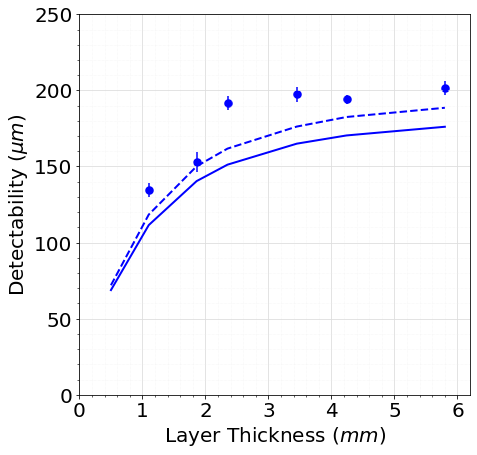

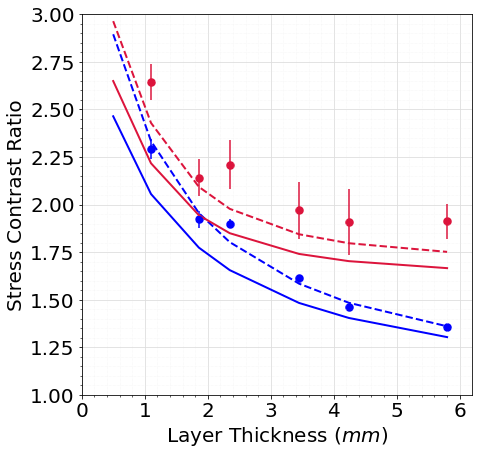

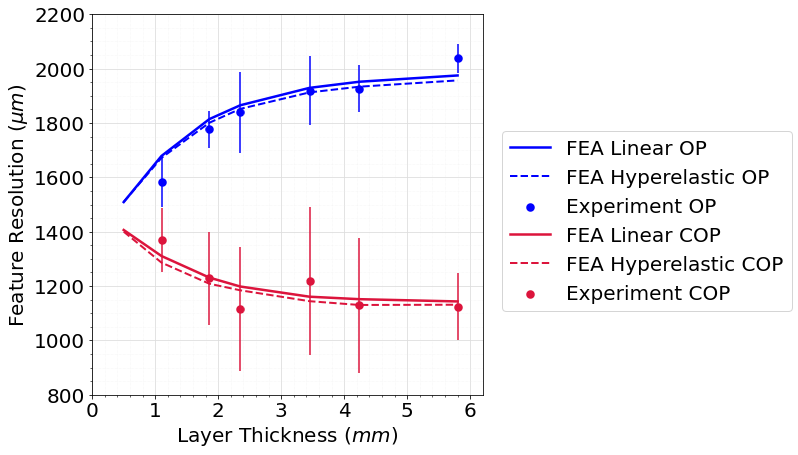

In [3]:
# SCANS = [[LT,P,DET,DET_STD,CON,CON_STD,RES,RES_STD,C_CON,_C_CON_STD,C_RES,C_RES_STD,]]
# SIMS = [[LT,P,DET,CON,RES,C_CON,C_RES,E, Mech Con]]

SCANS_SIG = np.array([ # variables and metrics extracted from experimental data
        [1.0980,0.1087,0.1353,0.0048,2.2925,0.0518,1.5828,0.0925,2.6441,0.0943,1.3693,0.1191],  # 231104_Inc_5_0p5mm3
        [1.8590,0.1031,0.1460,0.0065,1.9099,0.0432,1.7762,0.0693,2.1383,0.0980,1.2291,0.1706],  # 231124_Inc_5_1mm3
        [2.3500,0.0844,0.1563,0.0046,1.8549,0.0225,1.8389,0.1500,2.1962,0.1289,1.1156,0.2298],  # 231104_Inc_5_2mm3
        [3.4500,0.0916,0.1706,0.0049,1.5908,0.0190,1.9188,0.1260,1.9637,0.1498,1.2183,0.2712],  # 231124_Inc_5_3mm3
        [4.2400,0.0973,0.1757,0.0031,1.4536,0.0083,1.9266,0.0868,1.9047,0.1720,1.1289,0.2498],  # 231124_Inc_5_4mm3
        [5.8000,0.0930,0.1750,0.0049,1.3465,0.0066,2.0379,0.0543,1.9085,0.0906,1.1248,0.1226]]) # 231104_Inc_5_5mm3
        
SIMS = np.array([ # variables and metrics extracted from linear material model simulation
        [0.5 , 0.1081, 0.0688, 2.4639, 1.5091, 2.6491, 1.4064, 17500.0, 9.0],
        [1.1 , 0.1081, 0.1115, 2.0553, 1.6788, 2.2169, 1.3106, 17500.0, 9.0],
        [1.86, 0.1081, 0.1404, 1.7735, 1.8144, 1.9438, 1.2312, 17500.0, 9.0],   
        [2.35, 0.1081, 0.1512, 1.6553, 1.8652, 1.8494, 1.1984, 17500.0, 9.0],
        [3.45, 0.1081, 0.165 , 1.4828, 1.9293, 1.7404, 1.1609, 17500.0, 9.0],
        [4.24, 0.1081, 0.1704, 1.4039, 1.9518, 1.7025, 1.1518, 17500.0, 9.0],
        [5.8 , 0.1081, 0.1761, 1.3032, 1.9749, 1.6657, 1.1435, 17500.0, 9.0]])


SIMS_Hyp = np.array([ # variables and metrics extracted from hyperelastic material model simulation
        [0.5 , 0.1081, 0.072 , 2.8949, 1.5096, 2.9639, 1.4002, 16410.0],
        [1.1 , 0.1081, 0.1184, 2.3335, 1.6717, 2.4291, 1.2863, 16410.0],
        [1.86, 0.0955, 0.1325, 1.926 , 1.801 , 2.0834, 1.2086, 16248.0],
        [2.35, 0.0844, 0.1262, 1.7583, 1.8519, 1.9631, 1.1845, 16064.0],
        [3.45, 0.0916, 0.1495, 1.5619, 1.9126, 1.8369, 1.1444, 16292.0],
        [4.24, 0.0985, 0.1661, 1.4744, 1.9336, 1.7938, 1.1305, 16292.0],
        [5.8 , 0.093 , 0.162 , 1.3497, 1.9567, 1.7481, 1.1314, 16210.0]])

c1 = 'blue'
c2 = 'crimson'
aspect = (7,7)
normalfont = 20
xrange = [0.0,6.2] # [0.7,6.2]
letterstart = 0.75

# Detectability
L0 = SIMS[:,0]/1000 # Initial Layer Thickness

%matplotlib inline
plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)

# SCALE DETECTABILITY FOR CHANGING PRELOAD
dets_e = SCANS_SIG[:,2]*10**3 + detgrad_hyp[1::]*10**3*( max(SIMS[:,1]) - SCANS_SIG[:,1])  # CHECK THS FOR LINEAR
dets_s = SIMS[:,2]*10**3 + detgrad*10**3*( max(SIMS[:,1]) - SIMS[:,1])
dets_hyp = SIMS_Hyp[:,2]*10**3 + detgrad_hyp*10**3*( max(SIMS[:,1]) - SIMS_Hyp[:,1])

plt.scatter(L0[1::]*1000, dets_e, linewidth=2.5, color=c1, label = "Experiment")
plt.errorbar(L0[1::]*1000, dets_e, yerr=SCANS_SIG[:,3]*10**3, color=c1, fmt="o")
plt.plot(L0*1000, dets_s, linewidth=2, color=c1, label = "FEA Linear")
plt.plot(L0*1000, dets_hyp, linewidth=2, color=c1, linestyle='dashed', label = "FEA Hyperelastic")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 13.5})
plt.rcParams.update({'font.size': normalfont})
plt.xlabel("Layer Thickness ($m m$)")
plt.xlim(xrange)
plt.ylim([0,250])
plt.ylabel("Detectability ($\mu m$)")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
plt.show()

# Contrast Ratio
L0 = SIMS[:,0]/1000 # Initial Layer Thickness

plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)

# SCALE Contrast FOR CHANGING PRELOAD
con_e = SCANS_SIG[:,4] + congrad_hyp[1::]*( max(SIMS[:,1]) - SCANS_SIG[:,1])
con_s = SIMS[:,3] + congrad*( max(SIMS[:,1]) - SIMS[:,1])
con_hyp = SIMS_Hyp[:,3] + congrad_hyp*( max(SIMS[:,1]) - SIMS_Hyp[:,1])
ccon_e = SCANS_SIG[:,8] + ccongrad_hyp[1::]*( max(SIMS[:,1]) - SCANS_SIG[:,1])
ccon_s = SIMS[:,5] + congrad*( max(SIMS[:,1]) - SIMS[:,1])
ccon_hyp = SIMS_Hyp[:,5] + ccongrad_hyp*( max(SIMS[:,1]) - SIMS_Hyp[:,1])

plt.scatter(L0[1::]*1000, con_e, linewidth=2.5, color=c1, label = "Experiment OP")
plt.errorbar(L0[1::]*1000, con_e, yerr=SCANS_SIG[:,5], color=c1, fmt="o")
plt.plot(L0*1000, con_s, linewidth=2, color=c1, label = "FEA Linear OP")
plt.plot(L0*1000, con_hyp, linewidth=2, color=c1, linestyle='dashed', label = "FEA Hyperelastic OP")
plt.scatter(L0[1::]*1000, ccon_e, linewidth=2.5, color=c2, label = "Experiment COP")
plt.errorbar(L0[1::]*1000, ccon_e, yerr=SCANS_SIG[:,9], color=c2, fmt="o")
plt.plot(L0*1000, ccon_s, linewidth=2, color=c2, label = "FEA Linear COP")
plt.plot(L0*1000, ccon_hyp, linewidth=2, color=c2, linestyle='dashed', label = "FEA Hyperelastic COP")
y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': 13.5})
order = [0,1,4,2,3,5]
plt.rcParams.update({'font.size': normalfont})
plt.xlabel("Layer Thickness ($m m$)")
ax.xaxis.set_ticks(np.arange(0, 10.5, 1))
plt.ylim([1,3.00])
plt.xlim(xrange)
plt.ylabel("Stress Contrast Ratio")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1)) 
plt.show()

# RESOLUTION
plt.figure(figsize=aspect)
plt.rcParams.update({'font.size': normalfont})
ax = plt.subplot(1,1,1)
L0 = SIMS[:,0]/1000
res_e = SCANS_SIG[:,6]*10**3
res_e_c = SCANS_SIG[:,10]*10**3
res_s = SIMS[:,4]*10**3
res_s_c = SIMS[:,6]*10**3
plt.scatter(L0[1::]*1000, res_e, linewidth=2.5, color=c1, label = "Experiment OP")
plt.errorbar(L0[1::]*1000, res_e, yerr=SCANS_SIG[:,7]*10**3, color=c1, fmt="o")
plt.plot(L0*1000, res_s, linewidth=2.5, color=c1, label = "FEA Linear OP")
plt.plot(L0*1000, SIMS_Hyp[:,4]*10**3, linewidth=2, linestyle='dashed', color=c1, label = "FEA Hyperelastic OP")
plt.scatter(L0[1::]*1000, res_e_c, linewidth=2.5, color=c2, label = "Experiment COP")
plt.errorbar(L0[1::]*1000, res_e_c, yerr=SCANS_SIG[:,11]*10**3, color=c2, fmt="o")
plt.plot(L0*1000, res_s_c, linewidth=2.5, color=c2, label = "FEA Linear COP")
plt.plot(L0*1000, SIMS_Hyp[:,6]*10**3, linewidth=2, linestyle='dashed', color=c2, label = "FEA Hyperelastic COP")


y1, y2 = ax.get_ylim()
start, end = ax.get_xlim()
handles, labels = ax.get_legend_handles_labels()
plt.rcParams.update({'font.size': normalfont})
order = [0,1,4,2,3,5]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = (1.05,0.22),ncol=1)
plt.rcParams.update({'font.size': normalfont})
plt.xlabel("Layer Thickness ($m m$)")
plt.xlim(xrange)
plt.ylim([800,2200])
plt.ylabel("Feature Resolution ($\mu m$)")
ax.grid(which='major', color='#DDDDDD', linewidth=0.8)
ax.grid(which='minor', color='#EEEEEE', linestyle=':', linewidth=0.5)
ax.minorticks_on()
ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(base=1))
plt.show()